In [2]:
!pip install pyntcloud  

In [3]:
!pip install plotnine

In [4]:
!pip install open3d

In [5]:
import open3d as o3d
import numpy as np
from pyntcloud import PyntCloud


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Point Clouds

### Pyntcloud

In [6]:
from pyntcloud import PyntCloud

cloud = PyntCloud.from_file("igea.ply")

cloud.points

,x,y,z
0,0.008178,-0.049651,0.014658
1,0.008438,-0.049669,0.014241
2,0.008720,-0.049658,0.014413
3,0.008701,-0.049639,0.013817
4,0.008984,-0.049644,0.013991
...,...,...,...
134340,0.002701,0.049424,0.017751
134341,-0.000315,0.049428,0.018828
134342,-0.000593,0.049564,0.018655
134343,-0.000899,0.049603,0.018518


In [7]:
cloud.points.describe()

,x,y,z
count,134345.000000,134345.000000,134345.000000
mean,0.001005,0.002486,0.004514
std,0.018723,0.026966,0.026193
min,-0.034556,-0.049669,-0.049538
25%,-0.015538,-0.018014,-0.015768
50%,0.001179,0.002914,0.006157
75%,0.017673,0.025023,0.026701
max,0.034556,0.049669,0.049538


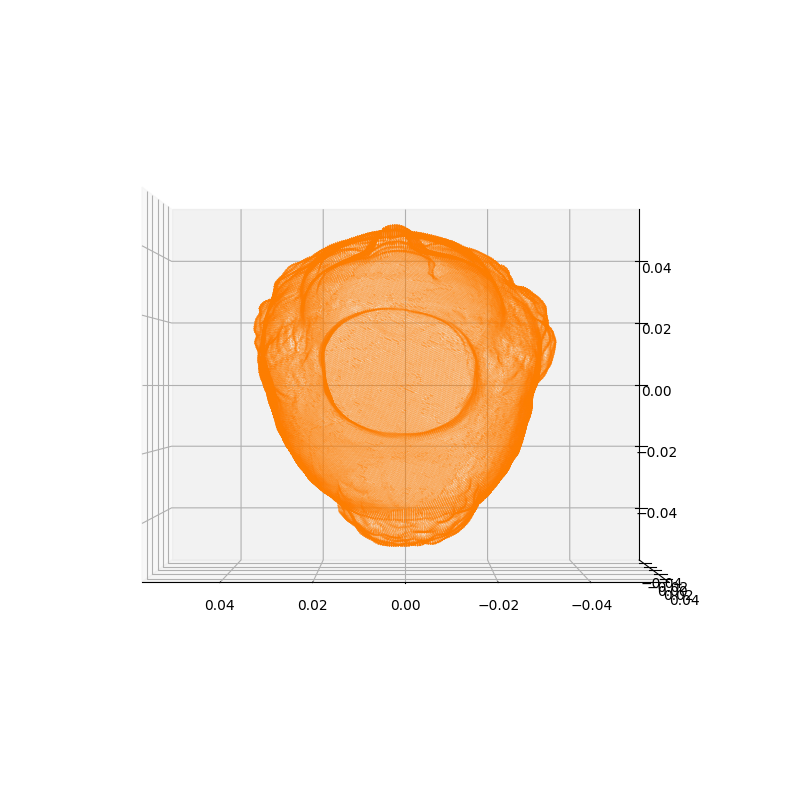

In [8]:
cloud.plot()

In [9]:
cloud.centroid

array([0.00100477, 0.00248553, 0.00451366], dtype=float32)

In [10]:
cloud.get_neighbors(k=10)

array([[ 46328,  46326,      1, ...,  46765,  46357,  46703],
       [     2,  46359,      0, ...,  46326,  46325,  46358],
       [     1,  46325,      4, ...,  46703,  46359,  46701],
       ...,
       [134343, 134341,  11051, ..., 134010,  11053,  11047],
       [134342, 134010, 133824, ...,  11051,  11045, 134341],
       [ 11059,  10319, 133838, ...,  10313,  11058,  10320]])

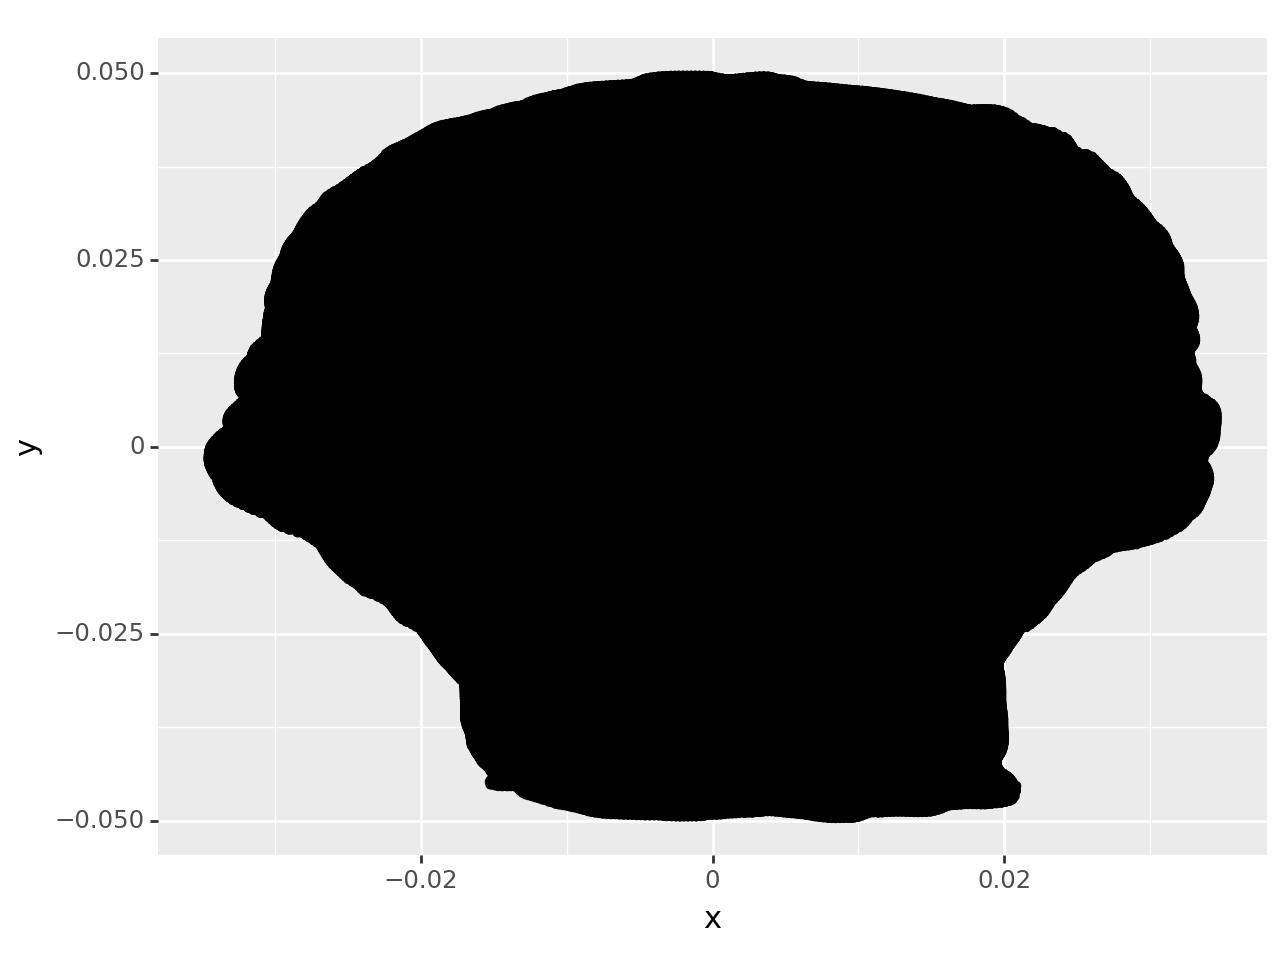

<Figure Size: (640 x 480)>

In [11]:
import plotnine as p9

distance=cloud.get_neighbors(k=10)

p9.ggplot(cloud.points, p9.aes(x='x', y='y', z='z')) + p9.geom_point(size=1)

In [12]:
cloud.points.describe()

,x,y,z
count,134345.000000,134345.000000,134345.000000
mean,0.001005,0.002486,0.004514
std,0.018723,0.026966,0.026193
min,-0.034556,-0.049669,-0.049538
25%,-0.015538,-0.018014,-0.015768
50%,0.001179,0.002914,0.006157
75%,0.017673,0.025023,0.026701
max,0.034556,0.049669,0.049538


<AxesSubplot: >

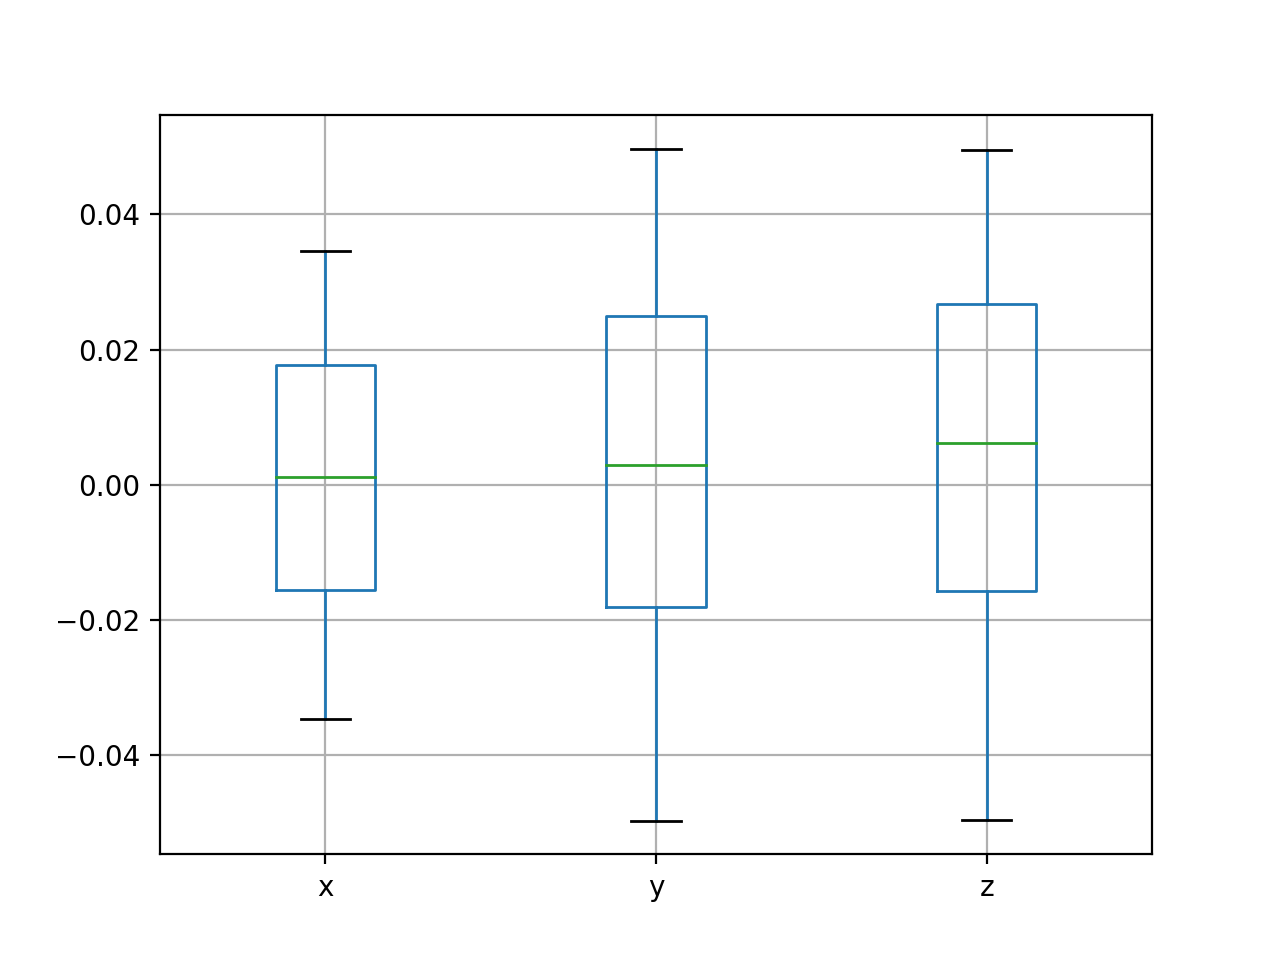

In [13]:
cloud.points.boxplot()

array([[<AxesSubplot: xlabel='x', ylabel='x'>,
        <AxesSubplot: xlabel='y', ylabel='x'>,
        <AxesSubplot: xlabel='z', ylabel='x'>],
       [<AxesSubplot: xlabel='x', ylabel='y'>,
        <AxesSubplot: xlabel='y', ylabel='y'>,
        <AxesSubplot: xlabel='z', ylabel='y'>],
       [<AxesSubplot: xlabel='x', ylabel='z'>,
        <AxesSubplot: xlabel='y', ylabel='z'>,
        <AxesSubplot: xlabel='z', ylabel='z'>]], dtype=object)

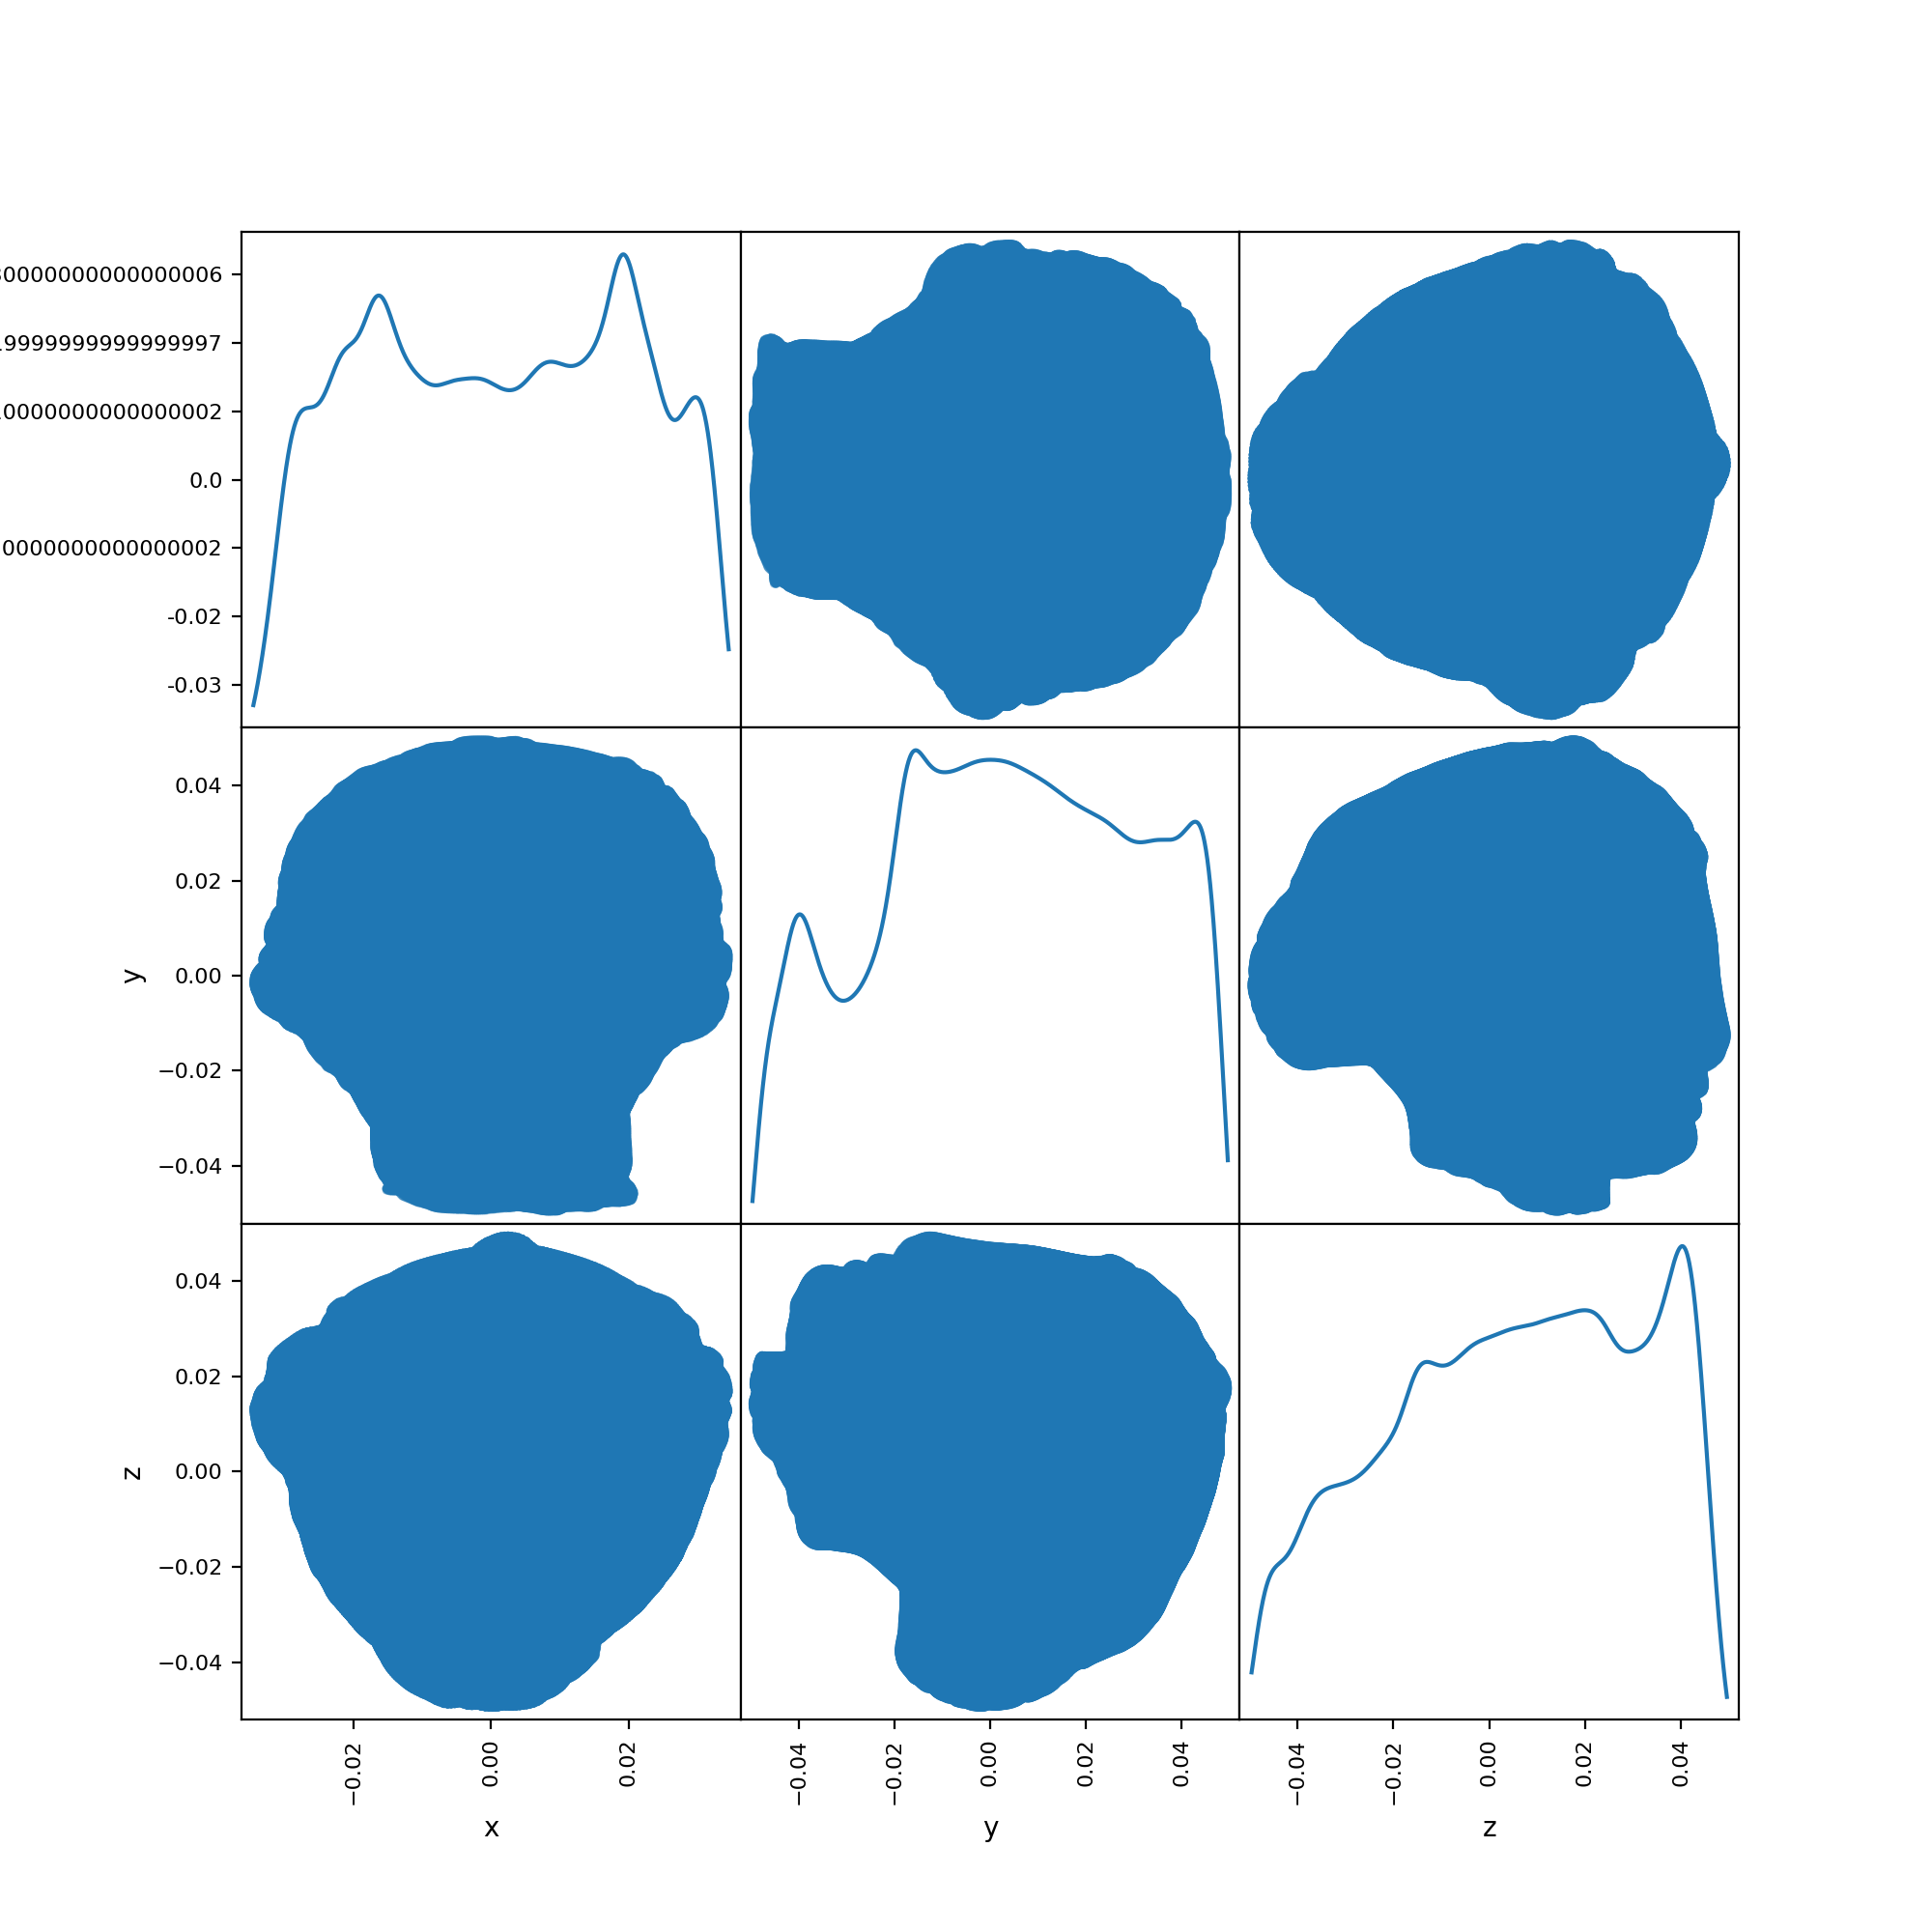

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(cloud.points, diagonal='kde', figsize=(10, 10))

### Open3D

In [18]:
print("Load a ply point cloud, print it, and render it")
ply_point_cloud = o3d.data.PLYPointCloud()
pcd = o3d.io.read_point_cloud(ply_point_cloud.path)
print(pcd)
print(np.asarray(pcd.points))

Load a ply point cloud, print it, and render it
[Open3D INFO] Downloading https://github.com/isl-org/open3d_downloads/releases/download/20220201-data/fragment.ply
[Open3D INFO] Downloaded to /root/open3d_data/download/PLYPointCloud/fragment.ply
PointCloud with 196133 points.
[[0.65234375 0.84686458 2.37890625]
 [0.65234375 0.83984375 2.38430572]
 [0.66737998 0.83984375 2.37890625]
 ...
 [2.00839925 2.39453125 1.88671875]
 [2.00390625 2.39488506 1.88671875]
 [2.00390625 2.39453125 1.88793314]]


In [ ]:
#o3d.visualization.draw_geometries([pcd],
#                                  zoom=0.3412,
#                                  front=[0.4257, -0.2125, -0.8795],
#                                  lookat=[2.6172, 2.0475, 1.532],
#                                  up=[-0.0694, -0.9768, 0.2024])

## Meshes

In [15]:
mesh=o3d.geometry.TriangleMesh.create_sphere()
mesh.compute_vertex_normals()

TriangleMesh with 762 points and 1520 triangles.

In [16]:
# Read the OBJ file
mesh = o3d.io.read_triangle_mesh("standford_bunny.obj",)

# Access vertices, normals, and triangles
vertices = mesh.vertices
normals = mesh.vertex_normals
triangles = mesh.triangles

# Print or use the data as needed
print(f"Vertices: {np.asarray(vertices)}")
print(f"Normals: {np.asarray(normals)}")
print(f"Triangles: {np.asarray(triangles)}")

[Open3D WARNING] Unable to load file standford_bunny.obj with ASSIMP
Vertices: []
Normals: []
Triangles: []
